# Principal Component Analysis

We will look at a toy dataset first before moving on to a more complex dataset. We will now start using functions wherever applicable so that our code is more modular and reusable.

In [356]:
import numpy as np
import matplotlib.pyplot as plt

In [357]:
rng = np.random.default_rng(seed = 42)

## Toy Dataset

### Generate Dataset

Let us first generate a dataset in $\mathbb{R}^{2}$ by sampling points from a multi-variate normal distribution.

In [358]:
# Generate Dataset
def generate(mu, cov, n):
    X = rng.multivariate_normal(mu, cov, n).T
    return X

mu = np.array([2, 5])
cov = np.array([
    [1, 0.9],
    [0.9, 1]
])
n = 100
X = generate(mu, cov, n)
X.shape

(2, 100)

### Visualise

Let us now visualise the dataset using a scatter plot.

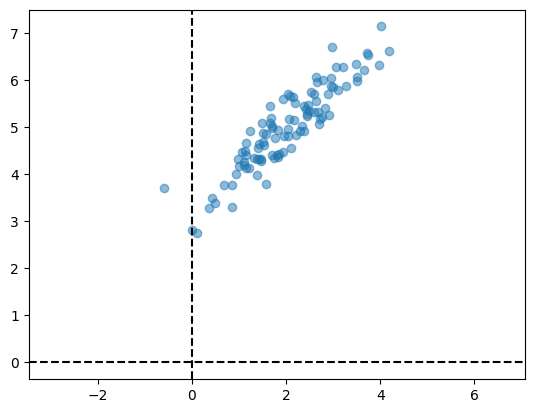

In [359]:
def plot(X):
    plt.scatter(X[0, :], X[1, :], alpha = 0.5)
    # alpha controls opacity of the points
    plt.axhline(color = 'black', linestyle = '--')
    plt.axvline(color = 'black', linestyle = '--')
    plt.axis('equal');
plot(X)

### Center the dataset

Let us now center the dataset and visualise both the centered and the original dataset side by side.

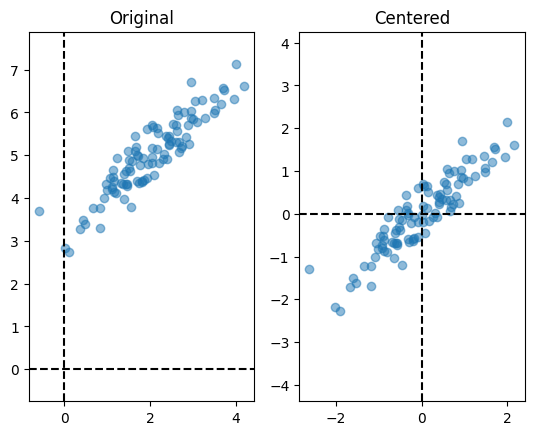

In [360]:
def center(X):
    mu = X.mean(axis = 1)
    X -= mu.reshape(2, 1)
    return X

plt.subplot(1, 2, 1)
plot(X)
plt.title('Original')
X = center(X)
plt.subplot(1, 2, 2)
plot(X)
plt.title('Centered');

### Covariance matrix

Now, we shall compute the covariance matrix.

In [361]:
def covariance(X):
    d, n = X.shape
    return X @ X.T / n

C = covariance(X)
C

array([[0.87218245, 0.74691674],
       [0.74691674, 0.76626231]])

### Principal components

All that remains is to find the eigenvectors of the covariance matrix, which are our principal components.

In [362]:
def get_PC(C):
    eigval, eigvec = np.linalg.eigh(C)
    eigval = np.flip(eigval)
    eigvec = np.flip(eigvec, axis = 1)
    return eigval, eigvec

var, pcs = get_PC(C)
print('First PC', pcs[:, 0])
print('Variance along first PC', var[0])
print('Second PC', pcs[:, 1])
print('Variance along second PC', var[1])

First PC [-0.7316855  -0.68164237]
Variance along first PC 1.5680143354602323
Second PC [ 0.68164237 -0.7316855 ]
Variance along second PC 0.0704304234954064


In [363]:
# demo of flip
A = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
A = np.flip(A, axis = 1)
A

array([[3, 2, 1],
       [6, 5, 4]])

### Visualize PCs

Let us visualize the principal components.

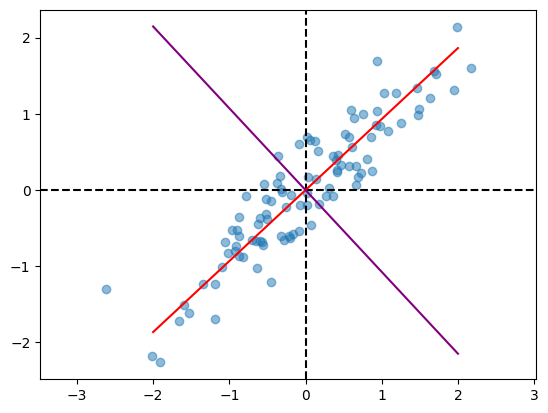

In [364]:
plot(X)
x = np.linspace(-2, 2)
plt.plot(x, pcs[:, 0][1]/pcs[:, 0][0] * x,
        color = 'red',
        label = 'PC-1')
plt.plot(x, pcs[:, 1][1]/pcs[:, 1][0] * x,
        color = 'purple',
        label = 'PC-2');

### Summary

We can now summarize all that we have done and express in the form of two functions.

In [365]:
def PCA(X):
    d, n = X.shape
    # Center
    X -= X.mean(axis = 1).reshape(d, 1)
    # Covariance matrix
    C = X @ X.T / n
    # PCs
    eigval, eigvec = np.linalg.eigh(C)
    eigval = np.flip(eigval)
    eigvec = np.flip(eigvec, axis = 1)
    return eigval, eigvec

In [366]:
def plot(X, pcs):
    # Plot the data
    plt.scatter(X[0, :], X[1, :], alpha = 0.5)
    plt.axhline(color = 'black', linestyle = '--')
    plt.axvline(color = 'black', linestyle = '--')
    # Plot the PCs
    x = np.linspace(-2, 2)
    plt.plot(x, pcs[:, 0][1]/pcs[:, 0][0] * x,
            color = 'red',
            label = 'PC-1')
    plt.plot(x, pcs[:, 1][1]/pcs[:, 1][0] * x,
            color = 'purple',
            label = 'PC-2')
    plt.legend()
    plt.axis('equal');

Let us now run PCA for different datasets and see the results.

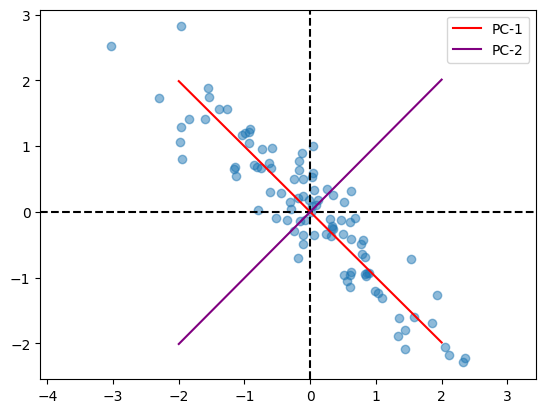

In [367]:
mu = np.array([2, 5])
cov = np.array([
    [1, -0.9],
    [-0.9, 1]
])
n = 100
X = generate(mu, cov, n)
var, pcs = PCA(X)
plot(X, pcs)

## MNIST

Let us now run PCA on the MNIST dataset and visulize the projections on the top two PCs.

In [368]:
from keras.datasets import mnist
train, test = mnist.load_data()
X_train, y_train = train
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


Instead of working with the entire dataset, let us just look at two classes.

In [369]:
y_1, y_2 = 8, 4
print(X_train[y_train == y_1].shape, X_train[y_train == y_2].shape)

(5851, 28, 28) (5842, 28, 28)


Using NumPy's advanced indexing, we extract the data-points in these two classes.

In [370]:
X = np.concatenate((X_train[y_train == y_1][:100],
                    X_train[y_train == y_2][:100]),
                    axis = 0)
X = X.reshape(X.shape[0], -1).T
X = X.astype(float) # needed while mean subtracting
y = np.concatenate((y_train[y_train == y_1][:100],
                    y_train[y_train == y_2][:100]),
                    axis = 0)
# Change y_1 to 0 and y_2 to 1
y = np.where(y == y_1, 0, 1)
print(X.shape, y.shape)

(784, 200) (200,)


We can now project the data-points onto the top two PCs and visualise the resulting projections in the form of a scatter plot.

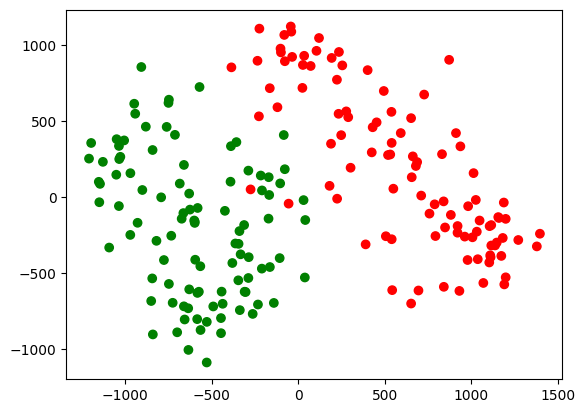

In [371]:
var, pcs = PCA(X)
proj = (X.T @ pcs[:, :2]).T
colors = np.array(['red', 'green'])
plt.scatter(proj[0, :], proj[1:, ], c = colors[y]);

This can now be used in a downstream
task such as classification. Notice the neat separation that we get even with just two principal components. This is dimensionality reduction in action.